In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data1 = data.copy()

In [4]:
data1 = data1.drop(['City.Population'], axis = 1)
data1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [6]:
y = np.empty(600, dtype=object)
i = 0
for value in data1['Taxable.Income']:
    if value<=30000:
        y[i] = 'Risky'
    else:
        y[i] = 'Good'
    i = i+1

In [7]:
t = pd.DataFrame(y, columns=['Target'])
t

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [8]:
data_1 = pd.concat([data1, t], axis=1)
data_1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [9]:
data_1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [11]:
data_1.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


In [12]:
data_1.groupby(['Undergrad', 'Marital.Status', 'Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
NO        Divorced       NO                 53               53      53
                         YES                44               44      44
          Married        NO                 44               44      44
                         YES                47               47      47
          Single         NO                 46               46      46
                         YES                54               54      54
YES       Divorced       NO                 50               50      50
                         YES                42               42      42
          Married        NO                 50               50      50
                         YES                53               53      53
          Single         NO                 55               55      55
                         YES                62               62      62

In [13]:
label_encoder = preprocessing.LabelEncoder()
data_1['Undergrad'] = label_encoder.fit_transform(data_1['Undergrad'])
data_1['Marital.Status'] = label_encoder.fit_transform(data_1['Marital.Status'])
data_1['Urban'] = label_encoder.fit_transform(data_1['Urban'])
data_1['Target'] = label_encoder.fit_transform(data_1['Target'])

In [14]:
data_1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [15]:
data_1.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [16]:
colname = list(data_1.columns)
colname

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

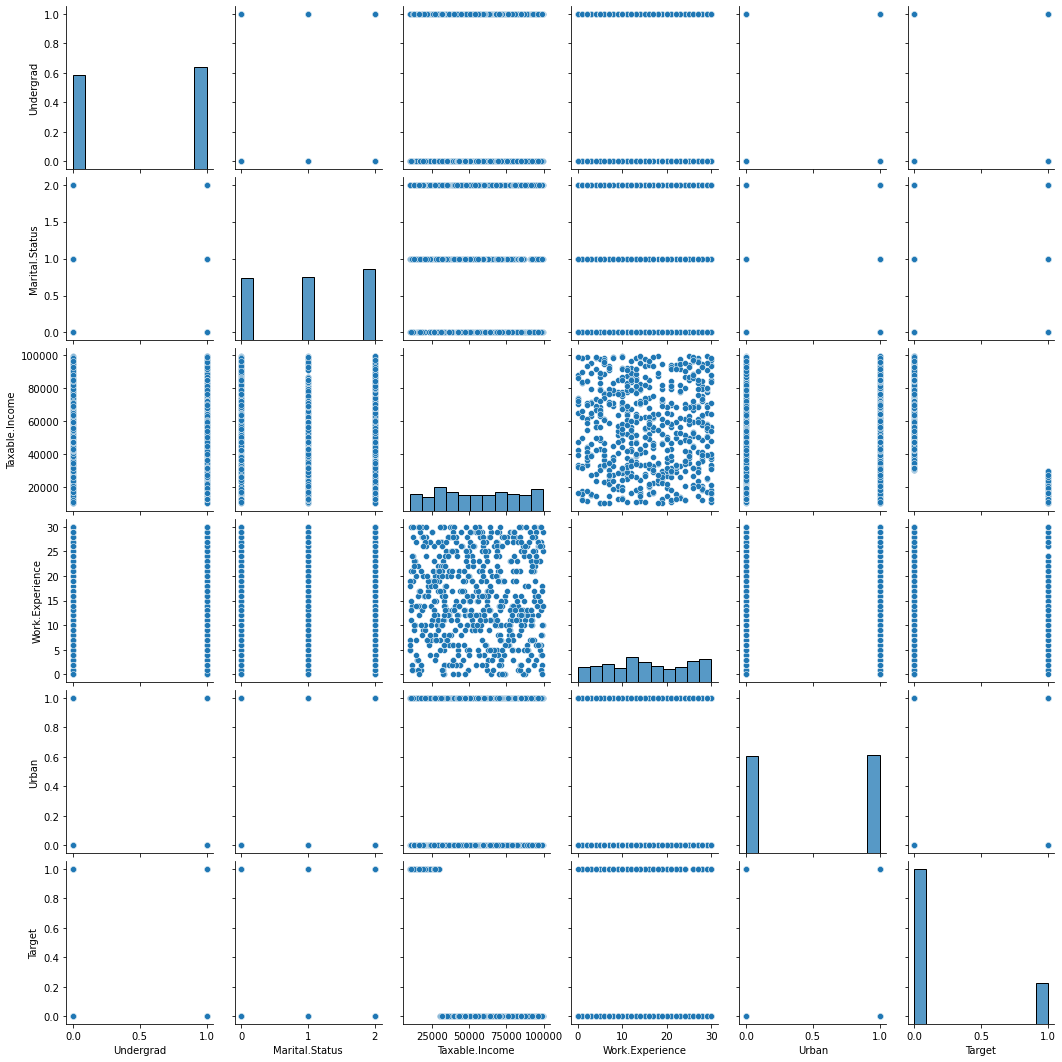

In [17]:
sns.pairplot(data_1)

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

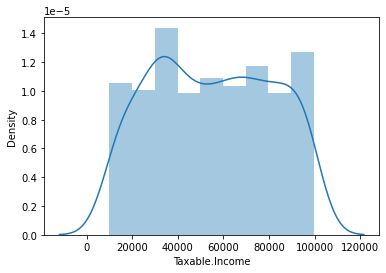

In [18]:
sns.distplot(data_1['Taxable.Income'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

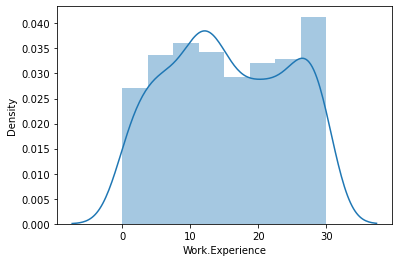

In [19]:
sns.distplot(data_1['Work.Experience'])

<AxesSubplot:>

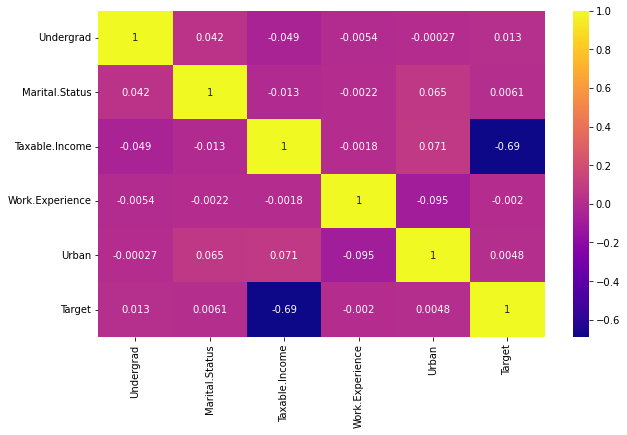

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_1.corr(), cmap='plasma', annot=True)

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

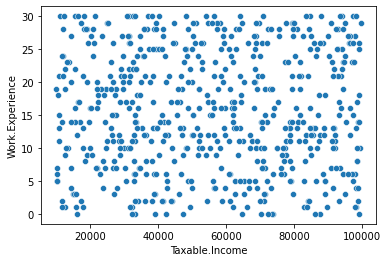

In [21]:
sns.scatterplot(x='Taxable.Income', y='Work.Experience', data=data_1)

In [22]:
X = data_1.iloc[:,0:5]
Y = data_1['Target']

In [23]:
X

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [24]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

## Random Forest

In [25]:
num_trees = 82
max_features = 4

In [28]:
kfold = KFold(n_splits=8, random_state=27, shuffle=True)
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [29]:
results = cross_val_score(model1, X, Y, cv=kfold)
print(results.mean())

0.9983333333333333


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
num_trees = 65
max_features = 5

In [32]:
kfold = KFold(n_splits=7, random_state=25, shuffle=True)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [33]:
results = cross_val_score(model2, X, Y, cv=kfold)
print(results.mean())

0.9983193277310924
